# テキストデータの可視化の練習

『三四郎』は、夏目漱石の前記三部作と呼ばれる作品群の一部です。

[『三四郎』](https://www.aozora.gr.jp/cards/000148/card794.html)（1909）・[『それから』](https://www.aozora.gr.jp/cards/000148/card1746.html)（1909）・[『門』](https://www.aozora.gr.jp/cards/000148/card785.html)（1910）の三部作を一つのコーパスとしてまとめて分析してみましょう。

『三四郎』だけの分析と比べると、どのような特徴が出てくるでしょうか？

## データの用意

In [1]:
# ファイルをダウンロードする
!curl -O https://www.aozora.gr.jp/cards/000148/files/794_ruby_4237.zip
!curl -O https://www.aozora.gr.jp/cards/000148/files/1746_ruby_18324.zip
!curl -O https://www.aozora.gr.jp/cards/000148/files/785_ruby_1656.zip
# textフォルダ作る
!mkdir -p text
# ファイルをtextフォルダに解凍
!unzip -d text -o 794_ruby_4237.zip
!unzip -d text -o 1746_ruby_18324.zip
!unzip -d text -o 785_ruby_1656.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  154k  100  154k    0     0  1091k      0 --:--:-- --:--:-- --:--:-- 1099k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  197k  100  197k    0     0  1870k      0 --:--:-- --:--:-- --:--:-- 1899k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  147k  100  147k    0     0  2090k      0 --:

Archive:  794_ruby_4237.zip
  inflating: text/sanshiro.txt       
Archive:  1746_ruby_18324.zip
Made with WinArchiver Lite (http://www.tida.bz/macwinzipper)
  inflating: text/sorekara.txt       
Archive:  785_ruby_1656.zip
  inflating: text/mon.txt            


In [2]:
# 青空文庫の記法を削除する

import re

input_fn = "text/sanshiro.txt"
output_fn = "text/sanshiro.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [3]:
input_fn = "text/sorekara.txt"
output_fn = "text/sorekara.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [4]:
input_fn = "text/mon.txt"
output_fn = "text/mon.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [5]:
import sys

# 冒頭と末尾の説明を取り除く（何行取り除くかは目視で確認）

if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sanshiro.stripruby.txt | ghead -n -14 > text/sanshiro.corpus.txt
else:
    !tail -n +22 text/sanshiro.stripruby.txt | head -n -14 > text/sanshiro.corpus.txt

In [6]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sorekara.stripruby.txt | ghead -n -14 > text/sorekara.corpus.txt
else:
    !tail -n +22 text/sorekara.stripruby.txt | head -n -14 > text/sorekara.corpus.txt

In [7]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +18 text/mon.stripruby.txt | ghead -n -14 > text/mon.corpus.txt
else:
    !tail -n +18 text/mon.stripruby.txt | head -n -14 > text/mon.corpus.txt

In [8]:
# 3つのファイルを統合する

!cat text/sanshiro.corpus.txt text/sorekara.corpus.txt text/mon.corpus.txt > text/all.corpus.txt

これで、三作品をまとめて分析する準備ができました。

演習の内容を参考にして、ワードクラウド、共起ネットワーク、共起ヒートマップを作ってみましょう。

## ワードクラウド

In [ ]:
# your code goes here

fpath = "C:/Users/yuuum/AppData/Local/Microsoft/Windows/Fonts/NotoSansJP-VariableFont_wght.ttf"
input_fn = "text/all.corpus.txt"



In [ ]:
# ファイルを読み込み、テキストを一行ずつ解析
import spacy

nlp = spacy.load("ja_ginza")

all_tokens = []
with open(input_fn, "r") as f:
    for line in f:
        tokens = [token for token in nlp(line)]
        all_tokens.extend(tokens)



In [7]:
from collections import Counter

# 分析対象とする品詞（内容語 - 名詞、動詞、形容詞）と不要語（ストップワード）を指定する
include_pos = ("NOUN", "VERB", "ADJ", "?????")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん",\
              "ゐる", "事")

# 単語の頻度を数える
counter = Counter(token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords)

# 出現頻度top 20を出力する
for word, count in counter.most_common(20):
    print(f"{count:>5} {word}")



 1172 来る
  944 見る
  941 御
  849 云ふ
  845 時
  782 自分
  779 出る
  680 聞く
  666 云う
  636 行く
  619 言う
  590 つ
  581 中
  572 人
  564 上
  562 所
  535 米
  502 気
  498 方
  472 女


In [8]:
words = [token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords]

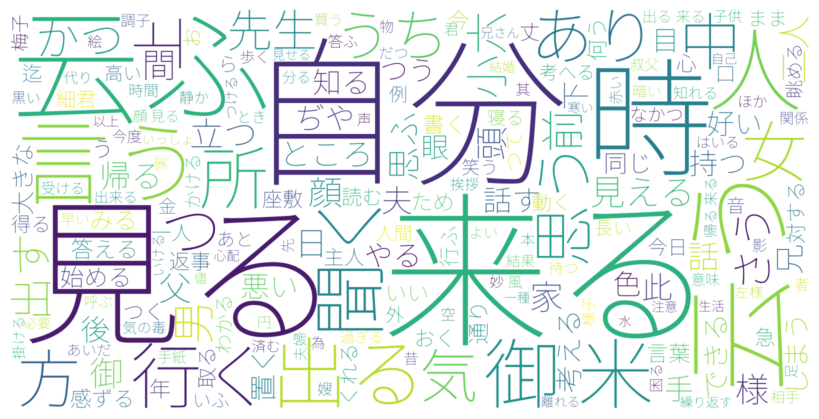

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ワードクラウドの表示設定と作成
wordcloud = WordCloud(
    width=1600, height=800,
    background_color="white", font_path=fpath
).generate(' '.join(words))

# プロット
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("wordcloud.png", dpi=300)
plt.show()

## 共起ネットワーク

In [17]:
# your code goes here

## 共起ヒートマップ

In [18]:
# your code goes here